In [ ]:
install.packages("AER")
install.packages("lmtest")
install.packages("foreign")
install.packages("plm")
install.packages("texreg")
install.packages("dplyr")
install.packages("stargazer")
install.packages("gplots")
install.packages("broom")
install.packages("tidymodels")
install.packages("viridis") 
install.packages("viridisLite")
install.packages("ggsci")
install.packages("repr")

In [34]:
library(AER)
library(plm)
library(lmtest)
library(foreign)
library(texreg)
library(dplyr)
library(stargazer)
library(gplots)
library(xtable)
library(IRdisplay)
library(repr)
library(broom)
library(tidymodels)
library(viridis) 
library(viridisLite)
library(ggsci)
library(repr)
library(stargazer)

In [35]:
# install the vdemdata package from GitHub
devtools::install_github("vdeminstitute/vdemdata")
df <- vdemdata::vdem

Skipping install of 'vdemdata' from a github remote, the SHA1 (941d5e09) has not changed since last install.
  Use `force = TRUE` to force installation


In [36]:
# set graph size
options(repr.plot.width=5, repr.plot.height=5)
# extract NA records
df_g <- subset(df, is.na(v2eldommon)==FALSE)

In [37]:
#list some observations
head(df)

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,⋯,e_miurbpop,e_pefeliex,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup
,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
2,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
3,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
4,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
5,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
6,Mexico,MEX,3,1794,1794-12-31,1,1,Viceroyalty of New Spain,1789,2020,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA


### Summary Statistics

In [38]:
dfs <- df[c("v2elfrfair", "v2elembaut", "v2eldommon", "v2elintmon",
            "v2csprtcpt", "v2exrescon", "v2jucomp",
            "v2juhccomp", "v2juhcind", "v2juncind"
            )]

df0 <- subset(dfs, dfs$v2eldommon==0)
df1 <- subset(dfs, dfs$v2eldommon==1)
df_labels <- c("Electrol integrity", "EMB autonomy", "Domestic monitoring", "International monitoring",
               "CSO environment", "Executive respects constitution", "Compliance with judiciary",
               "Compliance with high court", "High court independence", "Lower court independence")

stargazer(df0, covariate.labels=df_labels, digits=3,
          type = "text", title="Descriptive statistics - Domestic Monitoring: 0")


Descriptive statistics - Domestic Monitoring: 0
Statistic                         N    Mean  St. Dev.  Min   Pctl(25) Pctl(75)  Max 
------------------------------------------------------------------------------------
Electrol integrity              1,050 -1.166  1.253   -3.405  -2.212   -0.328  2.330
EMB autonomy                    1,050 -0.944  1.108   -2.783  -1.892   -0.092  2.792
Domestic monitoring             1,050 0.000   0.000     0       0        0       0  
International monitoring         687  0.198   0.399   0.000   0.000    0.000   1.000
CSO environment                 1,050 -0.617  1.294   -3.325  -1.555   0.304   2.294
Executive respects constitution 1,049 -0.404  1.242   -3.368  -1.251   0.556   2.342
Compliance with judiciary       1,047 -0.473  1.173   -3.445  -1.360   0.385   2.294
Compliance with high court      1,047 -0.095  1.219   -3.524  -1.214   0.725   2.664
High court independence         1,049 -0.584  1.183   -3.105  -1.397   0.290   3.028
Lower court inde

In [39]:
stargazer(df1, covariate.labels=df_labels, digits=3,
         type = "text", title="Descriptive statistics - Domestic Monitoring: 1")


Descriptive statistics - Domestic Monitoring: 1
Statistic                         N   Mean  St. Dev.  Min   Pctl(25) Pctl(75)  Max 
-----------------------------------------------------------------------------------
Electrol integrity              2,561 0.552  1.278   -3.189  -0.348   1.645   2.767
EMB autonomy                    2,561 0.884  1.506   -2.793  -0.225   2.110   3.733
Domestic monitoring             2,561 1.000  0.000     1       1        1       1  
International monitoring        2,152 0.431  0.495   0.000   0.000    1.000   1.000
CSO environment                 2,561 0.966  1.203   -3.193  0.232    1.841   3.178
Executive respects constitution 2,561 0.953  1.228   -2.789  0.174    1.821   3.375
Compliance with judiciary       2,561 0.776  1.389   -3.602  -0.150   1.753   3.327
Compliance with high court      2,561 0.862  1.295   -3.632  0.084    1.778   3.072
High court independence         2,561 0.712  1.327   -3.105  -0.285   1.761   3.435
Lower court independence   

In [40]:
#summarize the variables "year", "country_name"
summary(df[, c("year", "country_name")])

      year      country_name      
 Min.   :1789   Length:27192      
 1st Qu.:1879   Class :character  
 Median :1937   Mode  :character  
 Mean   :1927                     
 3rd Qu.:1981                     
 Max.   :2020                     

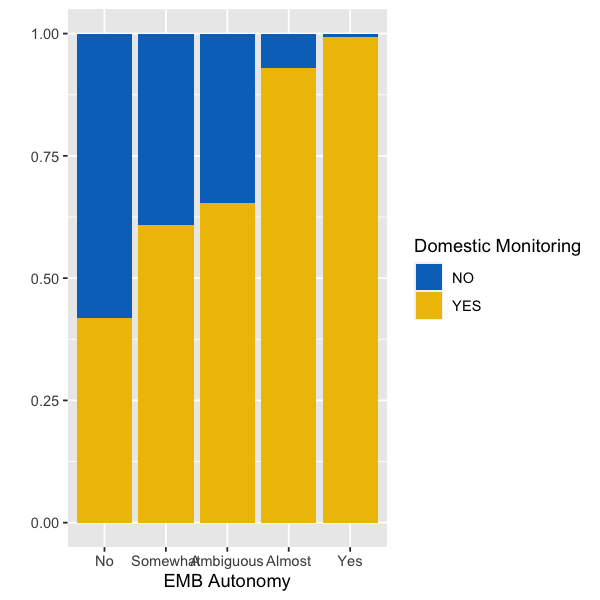

In [41]:
df_g$v2eldommon <- factor(df_g$v2eldommon, levels = c(0, 1), labels =c("NO", "YES"))
ggplot(df_g, aes(x = factor(v2elembaut_ord, labels=c("No", "Somewhat", "Ambiguous", "Almost", "Yes")), fill = v2eldommon)) +
  geom_bar(position = "fill") + labs(x="EMB Autonomy", fill="Domestic Monitoring", y= "") + scale_fill_jco() + scale_color_jco()

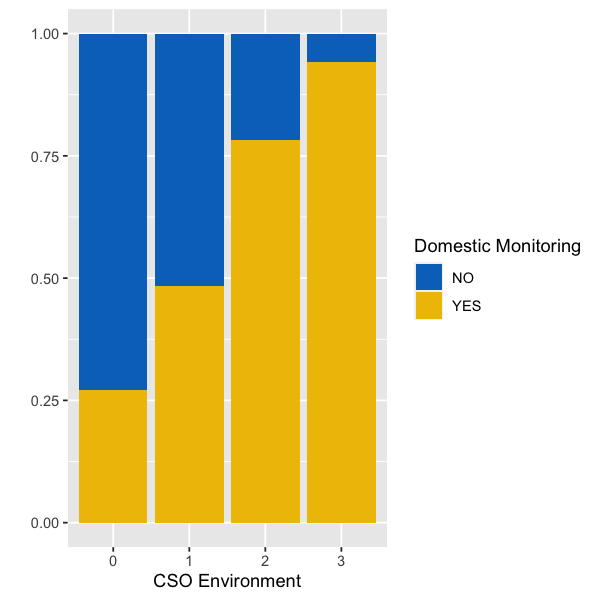

In [42]:
ggplot(df_g, aes(x = factor(v2csprtcpt_ord), fill = v2eldommon)) +
  geom_bar(position = "fill") + labs(x="CSO Environment", fill="Domestic Monitoring", y= "") + scale_fill_jco() + scale_color_jco()


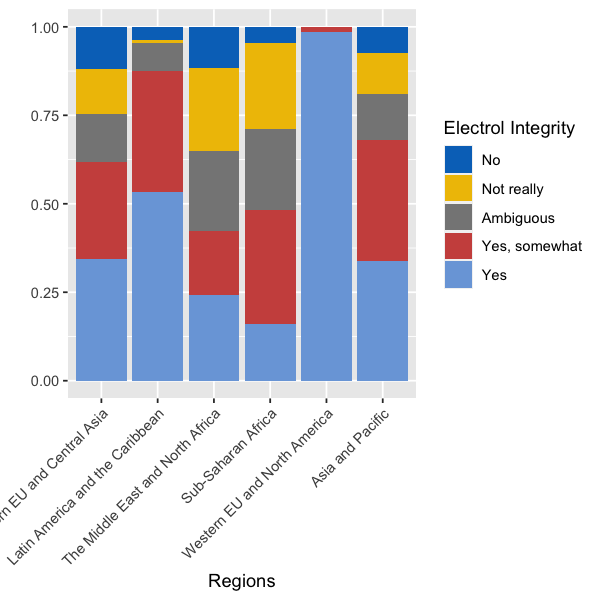

In [43]:
ggplot(subset(df_g, df_g$year > 1990),
       aes(
         x = factor(
           e_regionpol_6C,
           labels = c(
             "Eastern EU and Central Asia",
             "Latin America and the Caribbean",
             "The Middle East and North Africa",
             "Sub-Saharan Africa",
             "Western EU and North America",
             "Asia and Pacific"
           )
         ),
         fill = factor(
           v2elfrfair_ord,
           labels = c("No",
                      "Not really",
                      "Ambiguous",
                      "Yes, somewhat",
                      "Yes")
         )
       )) + geom_bar(position = "fill") + labs(x = "Regions",
                                               fill = "Electrol Integrity",
                                               y = "") + scale_fill_jco() + scale_color_jco() + theme(axis.text.x = element_text(
                                                 angle = 45,
                                                 vjust = 1,
                                                 hjust = 1
                                               ))

### Estimate the fixed effects regression

In [44]:
# Domestic monitoring
model_dmo <- plm(v2elfrfair ~ v2eldommon, 
                 index = c("country_id","year"), data = df, model = "within", effect="individual")
summary(model_dmo)

Oneway (individual) effect Within Model

Call:
plm(formula = v2elfrfair ~ v2eldommon, data = df, effect = "individual", 
    model = "within", index = c("country_id", "year"))

Unbalanced Panel: n = 178, T = 1-61, N = 3611

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-3.4761238 -0.4179528 -0.0098038  0.4534146  3.4447273 

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
v2eldommon 1.430662   0.041161  34.758 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    3206.2
Residual Sum of Squares: 2371.5
R-Squared:      0.26036
Adj. R-Squared: 0.222
F-statistic: 1208.09 on 1 and 3432 DF, p-value: < 2.22e-16

In [45]:
# EBM 
model_ebm <- plm(v2elfrfair ~ v2elembaut + v2eldommon + v2elintmon, 
                 index = c("country_id","year"), data = df, model = "within", effect="individual")
summary(model_ebm)

Oneway (individual) effect Within Model

Call:
plm(formula = v2elfrfair ~ v2elembaut + v2eldommon + v2elintmon, 
    data = df, effect = "individual", model = "within", index = c("country_id", 
        "year"))

Unbalanced Panel: n = 175, T = 1-61, N = 2839

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.2062648 -0.3171871 -0.0070191  0.2976428  2.6688565 

Coefficients:
            Estimate Std. Error t-value Pr(>|t|)    
v2elembaut  0.715677   0.014296 50.0604   <2e-16 ***
v2eldommon  0.356672   0.042078  8.4765   <2e-16 ***
v2elintmon -0.017161   0.031243 -0.5493   0.5829    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2382.9
Residual Sum of Squares: 848.89
R-Squared:      0.64375
Adj. R-Squared: 0.62005
F-statistic: 1602.82 on 3 and 2661 DF, p-value: < 2.22e-16

In [46]:
# Judicial Attributes + CSO
model_judicial<- plm(v2elfrfair ~ v2elembaut + v2eldommon
                     + v2csprtcpt
                     + v2exrescon + v2jucomp + v2juhccomp  + v2juncind + v2juhcind,
                     index = c("country_id","year"), data = df, model = "within", effect="individual")
summary(model_judicial)

Oneway (individual) effect Within Model

Call:
plm(formula = v2elfrfair ~ v2elembaut + v2eldommon + v2csprtcpt + 
    v2exrescon + v2jucomp + v2juhccomp + v2juncind + v2juhcind, 
    data = df, effect = "individual", model = "within", index = c("country_id", 
        "year"))

Unbalanced Panel: n = 178, T = 1-61, N = 3608

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.798378 -0.319237 -0.029682  0.308847  3.449565 

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
v2elembaut 0.378606   0.016068 23.5624 < 2.2e-16 ***
v2eldommon 0.284302   0.034864  8.1546 4.866e-16 ***
v2csprtcpt 0.101578   0.015001  6.7712 1.497e-11 ***
v2exrescon 0.224626   0.018743 11.9846 < 2.2e-16 ***
v2jucomp   0.137028   0.027155  5.0462 4.742e-07 ***
v2juhccomp 0.101568   0.027094  3.7488 0.0001806 ***
v2juncind  0.021901   0.026321  0.8321 0.4054243    
v2juhcind  0.071355   0.025364  2.8133 0.0049322 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

To

In [47]:
# Interaction with EBM
model_all_ebm <- plm(v2elfrfair ~ v2elembaut + v2eldommon + 
                     + v2csprtcpt
                     + v2exrescon + v2jucomp + v2juhccomp + v2juhcind
                     + v2elembaut:v2eldommon,
                     index = c("country_id","year"), data = df, model = "within", effect="individual")
summary(model_all_ebm)

Oneway (individual) effect Within Model

Call:
plm(formula = v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt + 
    v2exrescon + v2jucomp + v2juhccomp + v2juhcind + v2elembaut:v2eldommon, 
    data = df, effect = "individual", model = "within", index = c("country_id", 
        "year"))

Unbalanced Panel: n = 178, T = 1-61, N = 3608

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.746357 -0.317816 -0.022709  0.304386  3.357207 

Coefficients:
                       Estimate Std. Error t-value  Pr(>|t|)    
v2elembaut             0.471448   0.024332 19.3755 < 2.2e-16 ***
v2eldommon             0.245221   0.035572  6.8936 6.448e-12 ***
v2csprtcpt             0.094786   0.014940  6.3443 2.528e-10 ***
v2exrescon             0.214720   0.018742 11.4566 < 2.2e-16 ***
v2jucomp               0.141733   0.026854  5.2779 1.388e-07 ***
v2juhccomp             0.109989   0.027000  4.0737 4.732e-05 ***
v2juhcind              0.082538   0.019839  4.1604 3.255e-05 ***
v2elembaut:v2e

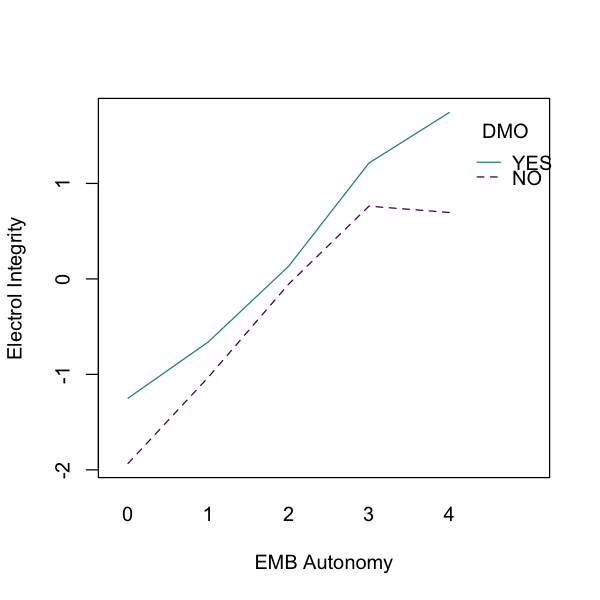

In [48]:
interaction.plot(response = df_g$v2elfrfair, x.factor=df_g$v2elembaut_ord, trace.factor = df_g$v2eldommon, fun = median, col= viridis(3), 
                 xlab="EMB Autonomy", ylab="Electrol Integrity", trace.label = "DMO")


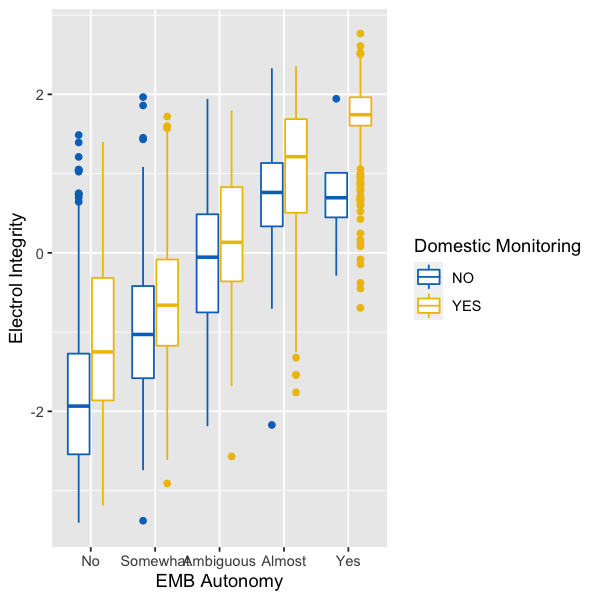

In [49]:
ggplot(df_g, aes(
  y = v2elfrfair, x = factor(v2elembaut_ord, labels=c("No", "Somewhat", "Ambiguous", "Almost", "Yes")), color = v2eldommon)) +
geom_boxplot()+labs(x = "EMB Autonomy", y="Electrol Integrity", color="Domestic Monitoring") + scale_fill_jco() + scale_color_jco()

In [50]:
# Interaction with CSO
model_all_cso <- plm(v2elfrfair ~ v2elembaut + v2eldommon + 
                       + v2csprtcpt:v2eldommon + v2csprtcpt
                       + v2exrescon + v2jucomp + v2juhccomp + v2juhcind,
                       index = c("country_id","year"), data = df, model = "within", effect="individual")
summary(model_all_cso)

Oneway (individual) effect Within Model

Call:
plm(formula = v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt:v2eldommon + 
    v2csprtcpt + v2exrescon + v2jucomp + v2juhccomp + v2juhcind, 
    data = df, effect = "individual", model = "within", index = c("country_id", 
        "year"))

Unbalanced Panel: n = 178, T = 1-61, N = 3608

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-2.651119 -0.312677 -0.019078  0.304884  3.455697 

Coefficients:
                       Estimate Std. Error t-value  Pr(>|t|)    
v2elembaut             0.396430   0.016078 24.6568 < 2.2e-16 ***
v2eldommon             0.283414   0.034552  8.2025 3.296e-16 ***
v2csprtcpt             0.190885   0.018503 10.3166 < 2.2e-16 ***
v2exrescon             0.218019   0.018539 11.7599 < 2.2e-16 ***
v2jucomp               0.146424   0.026723  5.4794 4.577e-08 ***
v2juhccomp             0.105697   0.026822  3.9408 8.285e-05 ***
v2juhcind              0.071166   0.019802  3.5939 0.0003304 ***
v2eldommon:v2c

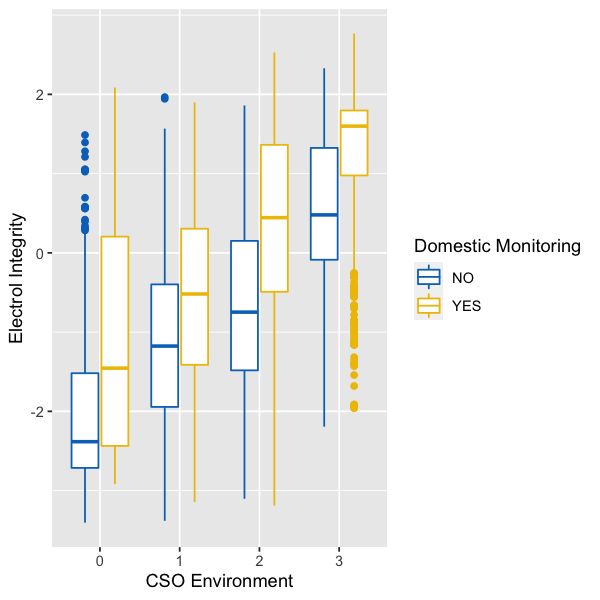

In [51]:
ggplot(df_g, aes(
  y = v2elfrfair, x = factor(v2csprtcpt_ord), color = v2eldommon)) +
  geom_boxplot()+labs(x = "CSO Environment", y="Electrol Integrity", 
                                                  color="Domestic Monitoring") + scale_fill_jco() + scale_color_jco()


### Test for fixed effects vs. OLS

In [52]:
# Test for fixed effects EBM versus OLS

ols_ebm <- lm(v2elfrfair ~ v2elembaut + v2eldommon + 
              + v2csprtcpt
              + v2exrescon + v2jucomp + v2juhccomp + v2juhcind
              + v2elembaut:v2eldommon, data = df)

# Accept Null, then OLS, Reject Null then FE : p-value < 2.2e-16
pFtest(model_all_ebm, ols_ebm) 



	F test for individual effects

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt + v2exrescon +  ...
F = 11.956, df1 = 177, df2 = 3422, p-value < 2.2e-16
alternative hypothesis: significant effects


In [53]:
# Test for fixed effects CSO versus OLS
ols_cso <- lm(v2elfrfair ~ v2elembaut + v2eldommon + 
                + v2csprtcpt:v2eldommon + v2csprtcpt
                + v2exrescon + v2jucomp + v2juhccomp + v2juhcind, data = df)

# Accept Null, then OLS, Reject Null then FE : p-value < 2.2e-16
pFtest(model_all_cso, ols_cso) 


	F test for individual effects

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt:v2eldommon +  ...
F = 11.708, df1 = 177, df2 = 3422, p-value < 2.2e-16
alternative hypothesis: significant effects


### Test for fixed vs. random effects - Hausman test

The Hausman test is conducted to test whether or not fixed or random effects fit the model.

In [54]:
# Hausman test 
model_all_random_ebm <- plm(v2elfrfair ~ v2elembaut + v2eldommon + v2elintmon 
                        + v2csprtcpt + e_fh_status
                        + v2exrescon + v2jucomp + v2juhccomp + v2juncind + v2juhcind
                        + v2eldommon:v2elembaut,  index = c("country_id","year"), data = df, model="random")

# # The p-value is significant then use fixed effects
phtest(model_all_ebm, model_all_random_ebm)



	Hausman Test

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt + v2exrescon +  ...
chisq = 351.8, df = 8, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


In [55]:
# Hausman test 
model_all_random_cso <- plm(v2elfrfair ~ v2elembaut + v2eldommon
                        + v2csprtcpt
                        + v2exrescon + v2jucomp + v2juhccomp + v2juncind + v2juhcind
                        + v2eldommon:v2csprtcpt,  index = c("country_id","year"), data = df, model="random")

# # The p-value is significant then use fixed effects
phtest(model_all_cso, model_all_random_cso)


	Hausman Test

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt:v2eldommon +  ...
chisq = 6.1355, df = 8, p-value = 0.6321
alternative hypothesis: one model is inconsistent


The null hypothesis is rejected, which means a fixed effects model is a better choice.

### Test for "time" effect

In [56]:
model_ebm_time <- plm(v2elfrfair ~ v2elembaut + v2eldommon + v2elintmon 
                        + v2csprtcpt + e_fh_status
                        + v2exrescon + v2jucomp + v2juhccomp + v2juncind + v2juhcind
                        + v2eldommon:v2elembaut, 
                          index = c("country_id","year"), data = df, model = "within", effect="time")

plmtest(model_ebm_time, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  v2elfrfair ~ v2elembaut + v2eldommon + v2elintmon + v2csprtcpt +  ...
chisq = 0.46735, df = 1, p-value = 0.4942
alternative hypothesis: significant effects


### Test for serial correlation with Breusch-Godfrey test

In [57]:
pbgtest(model_all_ebm)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt + v2exrescon +  ...
chisq = 1024.5, df = 1, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


In [58]:
pbgtest(model_all_cso)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  v2elfrfair ~ v2elembaut + v2eldommon + +v2csprtcpt:v2eldommon +  ...
chisq = 1026.8, df = 1, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


The p value < 2.2e-16, this means the presence of serial correlation in our error term. We can reject the null hypothesis which is that "there is no serial correlation". 

### Breusch-Pagan test for Heteroskedasticity

In [59]:
bptest(model_all_ebm)


	studentized Breusch-Pagan test

data:  model_all_ebm
BP = 258.68, df = 8, p-value < 2.2e-16


With the help of “Allerno” method heteroskedasticity and autocorrelation consistent (HAC) robust covariance
matrix is obtained, and standard errors are adjusted. 


In [60]:
model_all_hac_c <- coeftest(model_all_cso, 
                                save = TRUE,
                                vcov = vcovHC(model_all_cso, 
                                             method = "arellano", 
                                             type = "HC3"))



model_all_hac_e <- coeftest(model_all_ebm, 
                            save = TRUE,
                            vcov = vcovHC(model_all_ebm, 
                                        method = "arellano",
                                        type = "HC3"))

display_html(htmlreg(list(model_all_cso, model_all_hac_c, model_all_ebm, model_all_hac_e),
          type = "text",
          custom.model.names = c("Oneway Fixed Effects CSO", 
                                 "Oneway Fixed Effects CSO-(HAC)",
                                 "Oneway Fixed Effects EBM", 
                                 "Oneway Fixed Effects EBM-(HAC)")))

,Oneway Fixed Effects CSO,Oneway Fixed Effects CSO-(HAC),Oneway Fixed Effects EBM,Oneway Fixed Effects EBM-(HAC)
v2elembaut,0.40***,0.40***,0.47***,0.47***
,(0.02),(0.05),(0.02),(0.07)
v2eldommon,0.28***,0.28**,0.25***,0.25**
,(0.03),(0.09),(0.04),(0.08)
v2csprtcpt,0.19***,0.19***,0.09***,0.09*
,(0.02),(0.05),(0.01),(0.05)
v2exrescon,0.22***,0.22***,0.21***,0.21***
,(0.02),(0.05),(0.02),(0.05)
v2jucomp,0.15***,0.15*,0.14***,0.14
,(0.03),(0.07),(0.03),(0.07)


#### Oneway Fixed Effects (HAC)

In [61]:
glance(model_all_hac_e)

r.squared,adj.r.squared,statistic,p.value,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6488566,0.6298732,790.4134,0,1123.502,3422,3608


In [62]:
# coefficients of corrected models - EBM
model_all_hac_e[,1] / diff(range(df$v2elfrfair, na.rm = TRUE))

v2elembaut            v2eldommon            v2csprtcpt 
           0.07638504            0.03973121            0.01535735 
           v2exrescon              v2jucomp            v2juhccomp 
           0.03478939            0.02296389            0.01782062 
            v2juhcind v2elembaut:v2eldommon 
           0.01337290           -0.01851959

In [63]:
# coefficients of corrected models - CSO
model_all_hac_c[,1] / diff(range(df$v2elfrfair, na.rm = TRUE))

v2elembaut            v2eldommon            v2csprtcpt 
           0.06423046            0.04591925            0.03092760 
           v2exrescon              v2jucomp            v2juhccomp 
           0.03532389            0.02372387            0.01712524 
            v2juhcind v2eldommon:v2csprtcpt 
           0.01153042           -0.02721361

In [64]:
glance(model_all_hac_c)

r.squared,adj.r.squared,statistic,p.value,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6525582,0.6337748,803.3915,0,1111.658,3422,3608
